In [45]:
import pandas as pd
from re import sub
import numpy as np

from numpy import asarray
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


import time
import datetime
import nltk.data

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk import download
 


from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity

download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
rw = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-11-22/data/reviews.csv.gz')
li = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-11-22/data/listings.csv.gz')




In [47]:
rw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [48]:
rw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316056 entries, 0 to 316055
Data columns (total 6 columns):
listing_id       316056 non-null int64
id               316056 non-null int64
date             316056 non-null object
reviewer_id      316056 non-null int64
reviewer_name    316056 non-null object
comments         315977 non-null object
dtypes: int64(3), object(3)
memory usage: 14.5+ MB


In [49]:
rw.nunique()


listing_id        19149
id               316056
date               3103
reviewer_id      269299
reviewer_name     41189
comments         304891
dtype: int64

In [50]:
rw.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         79
dtype: int64

In [51]:
li.head(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,91%,NaN,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$45.00,7,60,7,7,60,60,7.0,60.0,5 weeks ago,t,16,22,35,119,2019-11-22,235,17,2010-06-07,2019-10-08,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
2,31560,https://www.airbnb.com/rooms/31560,20191122092441,2019-11-22,NICE & COZY 1BDR - IPANEMA BEACH,

In [52]:
li.shape

(33715, 106)

In [53]:
li.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 27.3+ MB


In [0]:
df = pd.merge(rw, li[['neighbourhood_cleansed', 'host_id', 'latitude', 'host_name',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [55]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,host_id,latitude,host_name,longitude,number_of_reviews,property_type
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...,Copacabana,68997,-22.96592,Matthias,-43.17896,243,Condominium
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...,Copacabana,68997,-22.96592,Matthias,-43.17896,243,Condominium
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...,Copacabana,68997,-22.96592,Matthias,-43.17896,243,Condominium


In [56]:
print("O datasete tem {} linhas e {} colunas.".format(*df.shape))

O datasete tem 316056 linhas e 13 colunas.


In [57]:
properties_per_host = pd.DataFrame(df.groupby('host_id',)['listing_id'].nunique())

# sort unique values descending and show the Top10
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(10)



,listing_id
host_id,
81876389,117
1982737,57
31275569,52
13580277,44
91654021,43
74463624,41
6000862,36
66039372,36
1381764,36


In [58]:
properties_per_host = pd.DataFrame(df.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top10
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(3)

,listing_id
host_id,
81876389,117
1982737,57
31275569,52


In [59]:
top1_host = df.host_id == 81876389
df[top1_host].neighbourhood.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Barra da Tijuca,7
Botafogo,1
Catete,2
Centro,9
Copacabana,43
Flamengo,5
Glória,1
Gávea,1
Humaitá,1


In [60]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,94
Condominium,23


In [61]:
top2_host = df.host_id == 1982737
df[top2_host].neighbourhood.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Barra da Tijuca,5
Botafogo,1
Copacabana,10
Flamengo,1
Gávea,2
Humaitá,1
Ipanema,19
Laranjeiras,1
Leblon,16


In [62]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,94
Condominium,23


In [63]:
top3_host = df.host_id == 31275569
df[top3_host].neighbourhood.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Barra da Tijuca,13
Copacabana,21
Ipanema,14
Leblon,4


In [64]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Aparthotel,2
Apartment,37
Hotel,2
House,10
Other,1


In [65]:
df.isna().sum()


listing_id            0
id                    0
date                  0
reviewer_id           0
reviewer_name         0
comments             79
neighbourhood         0
host_id               0
latitude              0
host_name            81
longitude             0
number_of_reviews     0
property_type         0
dtype: int64

In [66]:
df.isna().sum()


listing_id            0
id                    0
date                  0
reviewer_id           0
reviewer_name         0
comments             79
neighbourhood         0
host_id               0
latitude              0
host_name            81
longitude             0
number_of_reviews     0
property_type         0
dtype: int64

In [67]:
df.dropna(inplace=True)
df.isna().sum()

listing_id           0
id                   0
date                 0
reviewer_id          0
reviewer_name        0
comments             0
neighbourhood        0
host_id              0
latitude             0
host_name            0
longitude            0
number_of_reviews    0
property_type        0
dtype: int64

In [68]:
df.shape

(315896, 13)

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

        

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
analyzer = SentimentIntensityAnalyzer()


In [0]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [72]:
print_sentiment_scores("O dia é muito bom.")


O dia é muito bom.---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [73]:
print_sentiment_scores("The book is good.")
print_sentiment_scores("The book is GOOD!")
print_sentiment_scores("the book is very GOOD!!")
print_sentiment_scores("This book is really GOOD! But the price is horrible.")
print_sentiment_scores("The book is not good.")
print_sentiment_scores("The book is dirty.")

The book is good.----------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The book is GOOD!----------------------- {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6027}
the book is very GOOD!!----------------- {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.6715}
This book is really GOOD! But the price is horrible. {'neg': 0.223, 'neu': 0.509, 'pos': 0.268, 'compound': 0.1823}
The book is not good.------------------- {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
The book is dirty.---------------------- {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}


In [0]:
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [75]:
negative_score("This book is really GOOD! But the price is horrible.")

0.223

In [76]:
neutral_score("This book is really GOOD! But the price is horrible.")

0.509

In [77]:
positive_score("This book is really GOOD! But the price is horrible.")


0.268

In [78]:
compound_score("This book is really GOOD! But the price is horrible.")

0.1823

In [79]:
%%time

df['sentiment_neg'] = df['comments'].apply(negative_score)
df['sentiment_neu'] = df['comments'].apply(neutral_score)
df['sentiment_pos'] = df['comments'].apply(positive_score)
df['sentiment_compound'] = df['comments'].apply(compound_score)

CPU times: user 9min 18s, sys: 5.88 s, total: 9min 24s
Wall time: 9min 24s


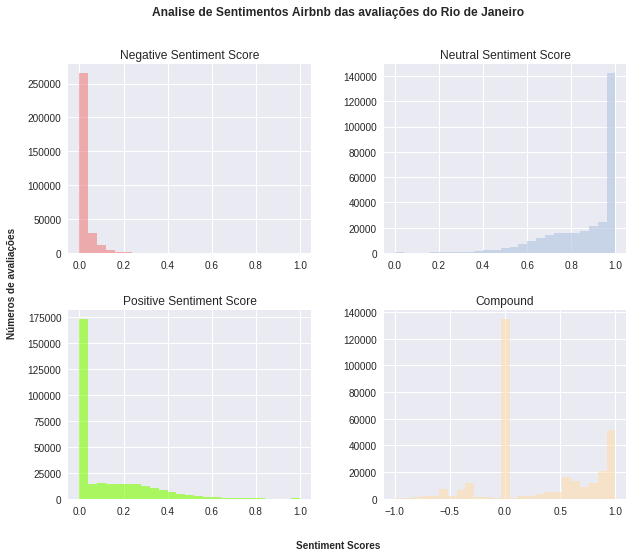

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))


df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')


fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Números de avaliações', fontweight='bold', va='center', rotation='vertical')


plt.suptitle('Analise de Sentimentos Airbnb das avaliações do Rio de Janeiro', fontsize=12, fontweight='bold');

In [81]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    315896.000000
mean          0.291847
std           0.479827
min          -0.998700
5%           -0.472400
10%          -0.296000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.458800
70%           0.668800
80%           0.874800
90%           0.960000
max           0.999600
Name: sentiment_compound, dtype: float64

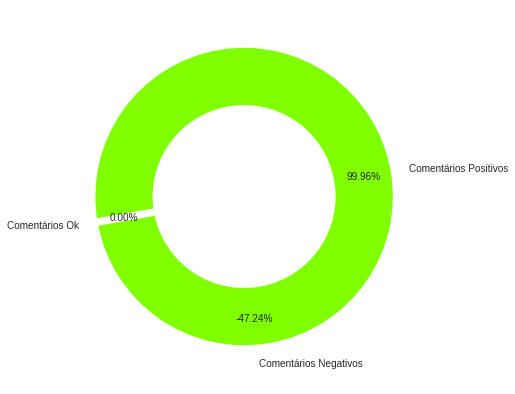

In [82]:
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Comentários Negativos', 'Comentários Ok','Comentários Positivos']
size = [neg, mid, pos]


plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

my_circle = plt.Circle((0,0), 0.6, color='white')


fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [0]:
df_pos = df.loc[df.sentiment_compound >= 0.95]


pos_comments = df_pos['comments'].tolist()

In [0]:
df_neg = df.loc[df.sentiment_compound < 0.0]


neg_comments = df_neg['comments'].tolist()

In [0]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

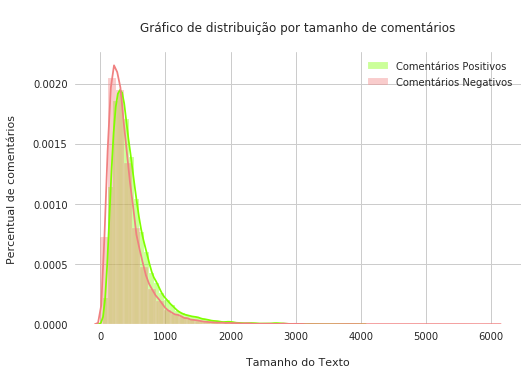

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nGráfico de distribuição por tamanho de comentários\n')
plt.legend(['Comentários Positivos', 'Comentários Negativos'])
plt.xlabel('\nTamanho do Texto')
plt.ylabel('Percentual de comentários\n');

In [87]:
pos_comments[10:15]

["This was our first stop and first time in Brazil and it was a blast to begin in Rio. The flat is located close to the beach, many restaurants, and is in a gentle but lively neighborhood. Max is a gem of a host he directed us to many places with many ideas sent via email, we truly appreciate his laid back vibe, professionalism, and kindness. The flat is very clean and we had everything we could need after spending days on the beach and nights out and about. We hope to pass through on another occasion and we'll be happy to call Max. Muito Obrigada!!",
 "Max is awesome, His place is great and in an amazing location in Copacabana. It's near the beach, near the bus lines and subway. This trip has been great and Max made it really easy to come and go as we please. We'll definitely be back to Max's the next time we're in Rio.",
 'The apartment was amazing. It has just been renovated and it is in a very good location. It was clean, cozy and there were clean towels and sheets. Max was a great

In [88]:
neg_comments[10:15]

['El departamento es fiel al su anuncio, nos sentimos muy cómodos en su living, pero en especial en su terraza donde compartimos desayunos y cenas. Su ubicación es excelente, y al estar en una calle vehicular restringida, no tiene ruidos, espero volver....  ',
 'Lugar bem localizado, pertinho de tudo: praia, supermercado, Farmacia. Transporte público bem a mão. Para nós que estávamos em 3 pessoas saia mais barato andar de táxi, sempre pelos app!! A título de Sugestões: por banquetas na mesa da sala, para gente não sentar com a roupa Úmida nas poltronas acabamos ficando de pé até poder entrar para o banho, já q estávamos em 3 pessoas. Senti falta Tb de forma de forno, proteção nas bordas da banheira para não machucar as pernas ao entrar, tapete antiderrapante no banheiro dentro e fora da banheira e melhorar a Wi-Fi. Mas são apenas melhorias nada q prejudique a qualidade e o conforto da estadia! Certamente ficaríamos no seu ap novamente! ',
 'A estadia no apartamento de Matthias foi ótim

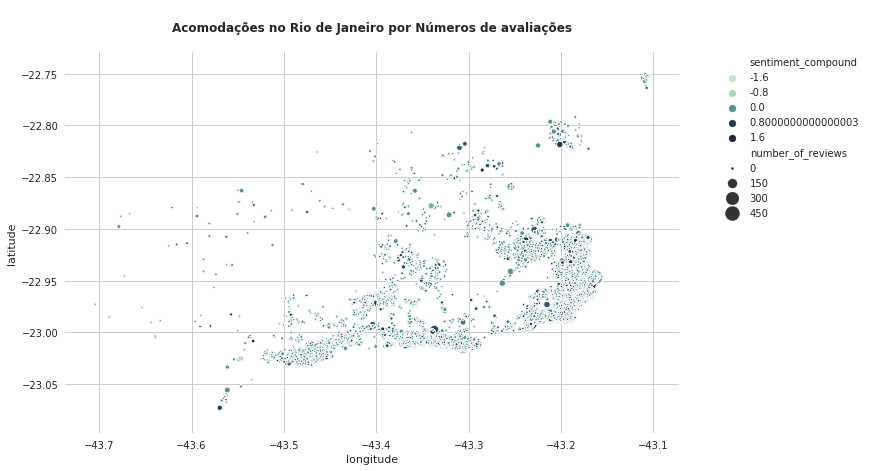

In [89]:
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAcomodações no Rio de Janeiro por Números de avaliações\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [0]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [0]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

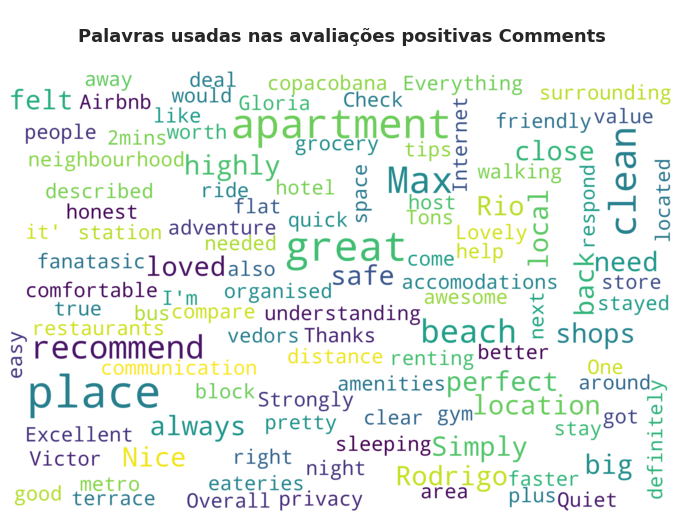

In [92]:

wordcloud = WordCloud(max_font_size=200, max_words=200, background_color='white',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPalavras usadas nas avaliações positivas')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

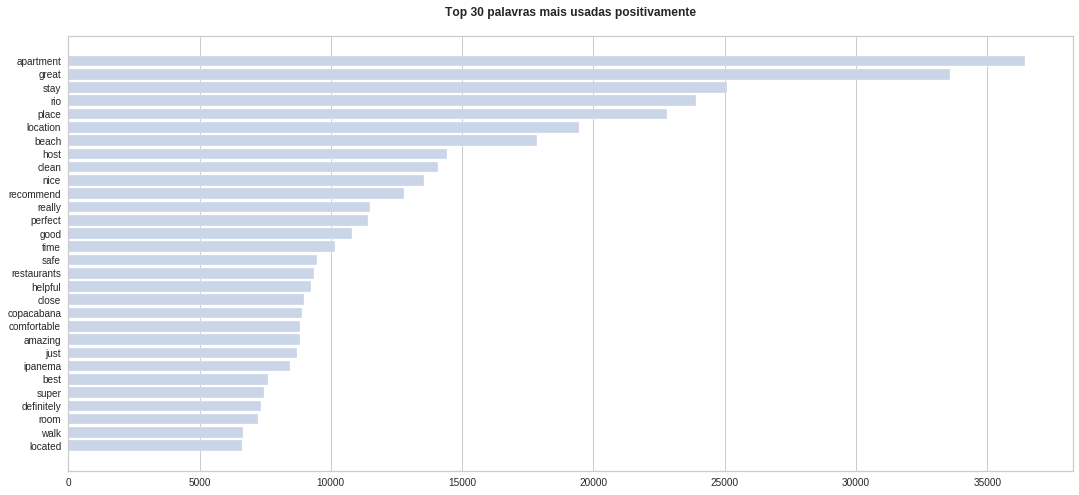

In [94]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()


set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('Top 30 palavras mais usadas positivamente\n', fontweight='bold')


visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [0]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [0]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [0]:
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 

In [0]:
import gensim

In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [101]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.030*"super" + 0.013*"apartamento" + 0.010*"bem" + 0.009*"tudo"')
(1, '0.065*"and" + 0.049*"the" + 0.029*"to" + 0.028*"is"')
(2, '0.066*"the" + 0.038*"and" + 0.028*"to" + 0.022*"is"')


In [102]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.075*"the" + 0.034*"and" + 0.024*"to" + 0.021*"is"')
(1, '0.034*"ana" + 0.021*"sergio" + 0.013*"anna" + 0.011*"luiz"')
(2, '0.049*"and" + 0.048*"the" + 0.035*"to" + 0.022*"is"')
(3, '0.033*"super" + 0.014*"apartamento" + 0.012*"bem" + 0.011*"tudo"')
(4, '0.069*"and" + 0.052*"the" + 0.030*"is" + 0.029*"very"')


In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [104]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.050*"the" + 0.042*"to" + 0.028*"you" + 0.028*"it"')
(1, '0.046*"super" + 0.020*"apartamento" + 0.017*"bem" + 0.015*"tudo"')
(2, '0.059*"we" + 0.054*"and" + 0.044*"the" + 0.040*"to"')
(3, '0.066*"and" + 0.065*"the" + 0.054*"is" + 0.031*"very"')
(4, '0.051*"and" + 0.045*"i" + 0.033*"to" + 0.032*"the"')
(5, '0.085*"the" + 0.050*"and" + 0.023*"is" + 0.020*"in"')
(6, '0.094*"the" + 0.051*"and" + 0.033*"of" + 0.031*"is"')
(7, '0.019*"et" + 0.016*"anna" + 0.015*"la" + 0.014*"le"')
(8, '0.071*"and" + 0.051*"wa" + 0.040*"the" + 0.036*"great"')
(9, '0.017*"claudia" + 0.009*"fotos" + 0.009*"rafael" + 0.009*"boa"')


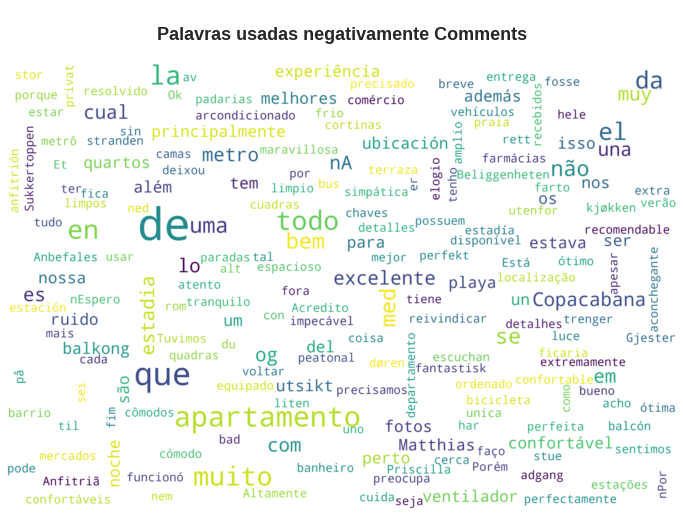

In [117]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nPalavras usadas negativamente')

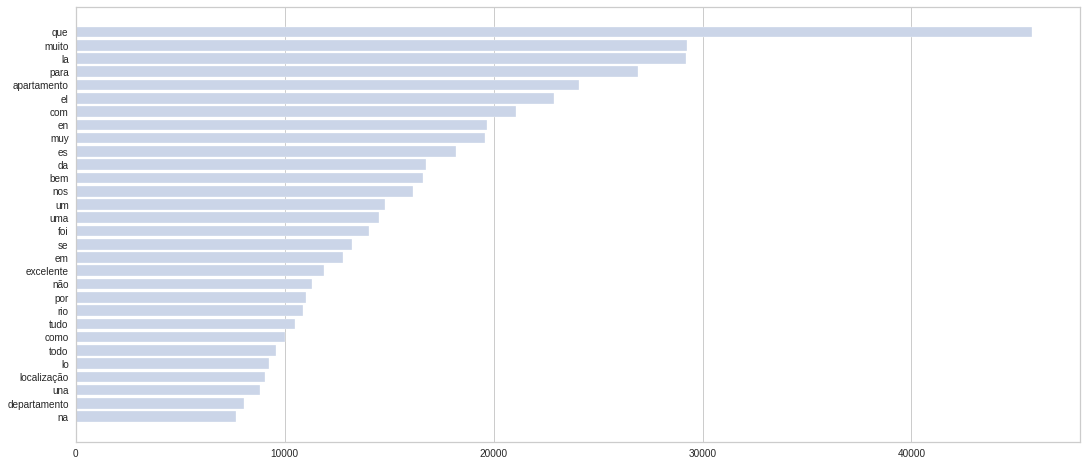

In [118]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()


set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('AS 30 palavras mais usadas em comentários negativos\n', fontweight='bold')

visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [0]:
doc_clean = [clean(comment).split() for comment in neg_comments]

In [0]:
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]


In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [112]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.048*"y" + 0.047*"la" + 0.032*"el" + 0.027*"muy"')
(1, '0.032*"the" + 0.015*"et" + 0.015*"and" + 0.013*"to"')
(2, '0.020*"apartamento" + 0.018*"bem" + 0.011*"tudo" + 0.010*"localização"')


In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [114]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.050*"y" + 0.048*"la" + 0.033*"el" + 0.028*"muy"')
(1, '0.027*"the" + 0.013*"et" + 0.012*"and" + 0.012*"in"')
(2, '0.007*"urbano" + 0.006*"en" + 0.006*"fico" + 0.005*"med"')
(3, '0.011*"quarto" + 0.009*"banheiro" + 0.009*"cama" + 0.008*"dia"')
(4, '0.025*"apartamento" + 0.024*"bem" + 0.015*"tudo" + 0.013*"localização"')


In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [116]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.052*"airbnb" + 0.026*"hidden" + 0.026*"by" + 0.019*"website"')
(1, '0.009*"bruno" + 0.005*"sabado" + 0.005*"sergio" + 0.005*"mal"')
(2, '0.007*"marcus" + 0.007*"vera" + 0.007*"denise" + 0.006*"fofa"')
(3, '0.014*"quarto" + 0.014*"banheiro" + 0.013*"cama" + 0.009*"ar"')
(4, '0.039*"und" + 0.030*"die" + 0.023*"ist" + 0.020*"sehr"')
(5, '0.027*"apartamento" + 0.024*"bem" + 0.015*"tudo" + 0.013*"localização"')
(6, '0.052*"y" + 0.051*"la" + 0.035*"el" + 0.029*"muy"')
(7, '0.066*"the" + 0.030*"and" + 0.027*"to" + 0.019*"wa"')
(8, '0.015*"hostel" + 0.011*"satisfeito" + 0.009*"felipe" + 0.008*"yuri"')
(9, '0.036*"et" + 0.029*"le" + 0.022*"la" + 0.022*"est"')
